<a href="https://colab.research.google.com/github/Worachet-Ch/project2022/blob/main/XGboots_v_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project' #เข้า drive
data1 = pd.read_csv(os.path.join(path,'df_1.csv'))

Mounted at /content/drive


In [ ]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
def hyperParameterTuning(data):
  y = data['telomere length (kb)'].values
  X = data.drop('telomere length (kb)',1).values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)
  param_tuning = {
        'learning_rate': [0.01, 0.1,0.05],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.3,0.5, 0.7,1],
        'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
        'n_estimators' : [100,200,300, 500,700,1000],
        'seed':[216],'alpha':[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
    }

  xgb_model = XGBRegressor()

  gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning                      
                            )

  gsearch.fit(X_train,y_train)

  return gsearch.best_params_

## First Data

In [ ]:
data1.drop('Unnamed: 0',1,inplace = True)
data1

<ipython-input-3-f170cadba2e7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1.drop('Unnamed: 0',1,inplace = True)


,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c,telomere length (kb)
0,2.0,58.0,47.200000,156.000000,19.40,112.000,64.00,70.00,19.741,13.631,...,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800000,7.30
1,2.0,57.0,47.400000,153.000000,20.20,114.000,75.00,69.00,19.300,12.500,...,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100000,6.36
2,2.0,24.0,53.200000,157.000000,21.60,103.000,69.00,78.00,21.300,14.600,...,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400000,9.71
3,2.0,62.0,54.400000,165.000000,20.00,95.000,75.00,83.00,21.600,15.200,...,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600000,6.17
4,2.0,86.0,49.000000,154.000000,20.70,129.000,79.00,83.00,19.907,15.369,...,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200000,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.0,25.0,47.000000,165.000000,17.30,104.000,63.00,89.00,20.387,12.852,...,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.393333,8.98
418,2.0,31.0,72.200000,168.000000,25.60,123.000,89.00,69.00,25.451,18.258,...,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.186667,8.23
419,2.0,32.0,54.500000,158.466667,21.68,113.160,71.83,72.30,22.707,21.599,...,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.486667,8.79
420,1.0,29.0,63.073333,168.866667,22.04,108.465,71.96,83.95,27.607,20.258,...,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,4.973333,8.93


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data1)

In [ ]:
df = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])
df

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.582090,0.154562,0.250000,0.198473,0.531707,0.333333,0.306452,0.101103,0.236189,...,0.424242,0.438849,0.211082,0.402299,0.350365,0.271186,0.376812,0.203390,0.540984,0.119472
1,1.0,0.567164,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,0.208738,...,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230,0.083010
2,1.0,0.074627,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,0.259709,...,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410,0.212956
3,1.0,0.641791,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,0.274272,...,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197,0.075640
4,1.0,1.000000,0.188082,0.204545,0.297710,0.697561,0.611111,0.516129,0.107011,0.278374,...,0.515152,0.460432,0.182058,0.137931,0.562044,0.050847,0.231884,0.559322,0.606557,0.012801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.0,0.089552,0.150838,0.454545,0.038168,0.453659,0.314815,0.612903,0.124093,0.217282,...,0.424242,0.812950,0.050132,0.793103,0.569343,0.152542,0.086957,0.254237,0.474317,0.184639
418,1.0,0.179104,0.620112,0.522727,0.671756,0.639024,0.796296,0.290323,0.304306,0.348495,...,0.621212,0.489209,0.084433,0.275862,0.562044,0.203390,0.260870,0.466102,0.440437,0.155547
419,1.0,0.194030,0.290503,0.306061,0.372519,0.543024,0.478333,0.343548,0.206655,0.429587,...,0.469697,0.741007,0.108179,0.597701,0.598540,0.135593,0.057971,0.152542,0.489617,0.177269
420,0.0,0.149254,0.450155,0.542424,0.400000,0.497220,0.480741,0.531452,0.381032,0.397039,...,0.727273,0.151079,0.197889,0.241379,0.167883,0.372881,1.000000,0.449153,0.405464,0.182700


In [ ]:
y = df['telomere length (kb)'].values
X = df.drop('telomere length (kb)',1).values

<ipython-input-6-51b57df3bccb>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1).values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
from xgboost import XGBRegressor
RegModel=XGBRegressor( learning_rate=0.1, n_estimators=100, objective='reg:linear',max_depth = 10, booster='gbtree',seed = 216)


In [ ]:
print(RegModel)

XGBRegressor(max_depth=10, seed=216)


In [ ]:
XGB= RegModel.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[12:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn import metrics
#Train
print('R2 Value Train:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, XGB.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, XGB.predict(X_train)))

R2 Value Train: 0.999994091609294
MSE Train: 2.0814525705334295e-07
MAE Train: 0.0003087119779161774


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.1008004269950563


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9350285323818772
MSE Test: 0.0019294545384460446
MAE Test: 0.02692275484211453


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


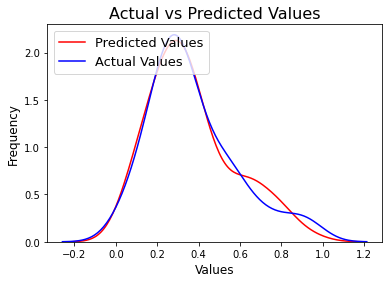

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [ ]:
hyperParameterTuning(df)

'alpha': 0,
 'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'seed': 216,
 'subsample': 0.5}

### เซตแรก

In [ ]:
y = df['telomere length (kb)'].values
X = df.drop('telomere length (kb)',1).values

<ipython-input-17-51b57df3bccb>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1).values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
xgb_model = XGBRegressor(alpha = 0,colsample_bytree=0.9,learning_rate = 0.05,max_depth = 5,min_child_weight=1,
        n_estimators = 1000,subsample = 0.5,seed = 216)

In [ ]:
XGB= xgb_model.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:10:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, XGB.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, XGB.predict(X_train)))

R2 Value Train: 0.9999957068060811
MSE Train: 1.512438828607636e-07
MAE Train: 0.00029942347347879187


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.06749321446427918


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9751642249855912
MSE Test: 0.0007375468120718518
MAE Test: 0.01751235713266475


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


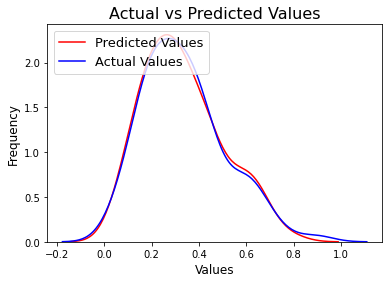

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### เซตสอง

In [ ]:
y = df['telomere length (kb)'].values
X = df.drop('telomere length (kb)',1).values

<ipython-input-25-51b57df3bccb>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1).values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
xgb_model = XGBRegressor(alpha = 0,colsample_bytree=0.9,learning_rate = 0.05,max_depth = 3,min_child_weight=1
        ,n_estimators = 1000,subsample = 0.5,seed = 216)

In [ ]:
XGB= xgb_model.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:10:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, XGB.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, XGB.predict(X_train)))

R2 Value Train: 0.9999797793218266
MSE Train: 7.123493461438471e-07
MAE Train: 0.0006526380455186355


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.06701084029576555


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9767309755031505
MSE Test: 0.0006910190975605304
MAE Test: 0.01785617588940719


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


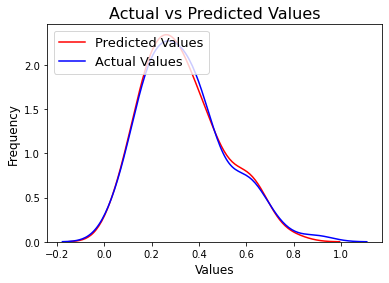

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### เซต 3

In [ ]:
y = df['telomere length (kb)'].values
X = df.drop('telomere length (kb)',1).values

<ipython-input-33-51b57df3bccb>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1).values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
xgb_model = XGBRegressor(alpha = 0,colsample_bytree=0.7,learning_rate = 0.1,max_depth = 5,min_child_weight=1
        ,n_estimators = 100,subsample = 1,seed = 216)

In [ ]:
XGB= xgb_model.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:10:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, XGB.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, XGB.predict(X_train)))

R2 Value Train: 0.9998619080824095
MSE Train: 4.864806529214577e-06
MAE Train: 0.001627422141742312


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.07306382646624554


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9597872415912143
MSE Test: 0.001194196345868347
MAE Test: 0.020167214417242552


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


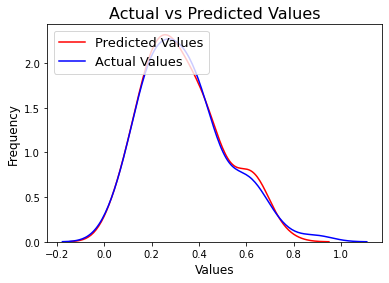

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## second data

In [ ]:
data2 = pd.read_csv(os.path.join(path,'df_2.csv'))
data2.drop('Unnamed: 0',1,inplace = True)

<ipython-input-46-9295e0cecbd9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data2.drop('Unnamed: 0',1,inplace = True)


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data2)

In [ ]:
df2 = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])
df2

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.582090,0.154562,0.250000,0.198473,0.531707,0.333333,0.306452,0.099431,0.230680,...,0.424242,0.438849,0.211082,0.402299,0.350365,0.271186,0.376812,0.203390,0.540984,0.119472
1,1.0,0.567164,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,0.208738,...,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230,0.083010
2,1.0,0.074627,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,0.259709,...,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410,0.212956
3,1.0,0.641791,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,0.274272,...,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197,0.075640
4,1.0,1.000000,0.188082,0.204545,0.297710,0.697561,0.611111,0.516129,0.112349,0.300850,...,0.515152,0.460432,0.182058,0.137931,0.562044,0.050847,0.231884,0.559322,0.606557,0.012801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.0,0.089552,0.150838,0.454545,0.038168,0.453659,0.314815,0.612903,0.120961,0.234903,...,0.424242,0.812950,0.050132,0.793103,0.569343,0.152542,0.086957,0.254237,0.461639,0.184639
418,1.0,0.179104,0.620112,0.522727,0.671756,0.639024,0.796296,0.290323,0.298434,0.346626,...,0.621212,0.489209,0.084433,0.275862,0.562044,0.203390,0.260870,0.466102,0.445082,0.155547
419,1.0,0.194030,0.498250,0.271818,0.700763,0.569366,0.503148,0.382581,0.237473,0.506432,...,0.469697,0.741007,0.108179,0.597701,0.598540,0.135593,0.057971,0.152542,0.498689,0.177269
420,0.0,0.149254,0.537579,0.565909,0.539695,0.582488,0.546296,0.554355,0.457402,0.309175,...,0.727273,0.151079,0.197889,0.241379,0.167883,0.372881,1.000000,0.449153,0.528689,0.182700


In [ ]:
y = df2['telomere length (kb)'].values
X = df2.drop('telomere length (kb)',1).values

<ipython-input-49-8bd2b2c93927>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1).values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
from xgboost import XGBRegressor
RegModel=XGBRegressor( learning_rate=0.1, n_estimators=100, objective='reg:linear',max_depth = 10, booster='gbtree',seed = 216)

In [ ]:
XGB= RegModel.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:11:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, XGB.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, XGB.predict(X_train)))

R2 Value Train: 0.9999940230709814
MSE Train: 2.1137667033850483e-07
MAE Train: 0.00031034842804025033


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.09933033505751933


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9242667540947961
MSE Test: 0.0022562169445079555
MAE Test: 0.02891467827227489


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


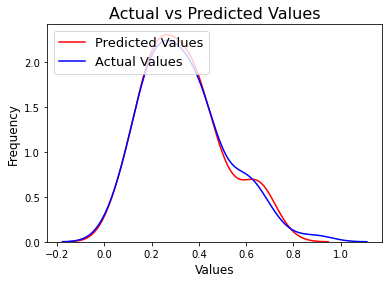

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [ ]:
hyperParameterTuning(df2)

'alpha': 0,
 'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'seed': 216,
 'subsample': 0.5}

### เซตแรก

In [ ]:
y = df2['telomere length (kb)'].values
X = df2.drop('telomere length (kb)',1).values

<ipython-input-57-8bd2b2c93927>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1).values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
xgb_model = XGBRegressor(alpha = 0,colsample_bytree=0.9,learning_rate = 0.05,max_depth = 5,min_child_weight=1,
        n_estimators = 1000,subsample = 0.5,seed = 216)

In [ ]:
XGB= xgb_model.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:11:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, xgb_model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, xgb_model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, xgb_model.predict(X_train)))

R2 Value Train: 0.9999956247501862
MSE Train: 1.547325950586973e-07
MAE Train: 0.0003083357068245478


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.07871838525250995


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.971835341337334
MSE Test: 0.000839071128557338
MAE Test: 0.018834850890493592


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


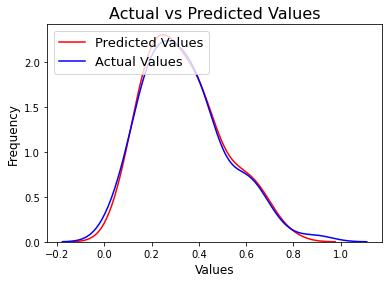

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### เซตสอง

'alpha': 0,
 'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'seed': 216,
 'subsample': 0.5}

In [ ]:
y = df2['telomere length (kb)'].values
X = df2.drop('telomere length (kb)',1).values

<ipython-input-65-8bd2b2c93927>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1).values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
xgb_model = XGBRegressor(alpha = 0,colsample_bytree=0.9,learning_rate = 0.05,max_depth = 3,min_child_weight=1
        ,n_estimators = 1000,subsample = 0.5,seed = 216)

In [ ]:
XGB= xgb_model.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:11:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, xgb_model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, xgb_model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, xgb_model.predict(X_train)))

R2 Value Train: 0.999979127468234
MSE Train: 7.381660803493368e-07
MAE Train: 0.0006792388564471075


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.07074126566676135


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9741582158392844
MSE Test: 0.0007698689076750309
MAE Test: 0.01832467281592481


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


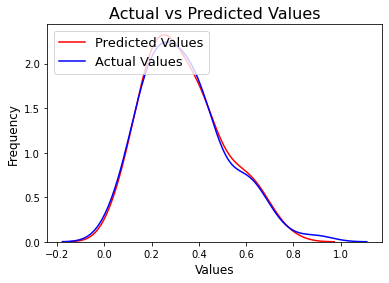

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### เซต 3

In [ ]:
y = df2['telomere length (kb)'].values
X = df2.drop('telomere length (kb)',1).values

<ipython-input-73-8bd2b2c93927>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1).values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
xgb_model = XGBRegressor(alpha = 0,colsample_bytree=0.7,learning_rate = 0.1,max_depth = 5,min_child_weight=1
        ,n_estimators = 100,subsample = 1,seed = 216)

In [ ]:
XGB= xgb_model.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:11:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, xgb_model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, xgb_model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, xgb_model.predict(X_train)))

R2 Value Train: 0.9998235300102825
MSE Train: 6.240937231273302e-06
MAE Train: 0.0018366525553523466


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.08516231481084817


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9626706833893002
MSE Test: 0.0011121012397829358
MAE Test: 0.021062283474535346


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


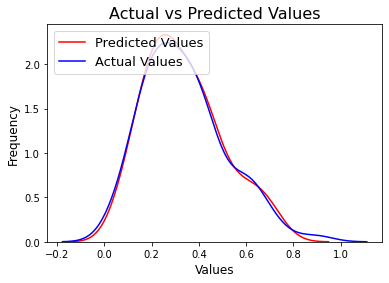

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

# data control

In [ ]:
data_file_path = os.path.join(path,'data_notmissing.csv') #ไปที่ไฟล์ confirmed-cases-since-280265.csv
data3 = pd.read_csv(data_file_path)
data3.drop({'Unnamed: 0'},1,inplace = True)

<ipython-input-81-eab412fc4bad>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data3.drop({'Unnamed: 0'},1,inplace = True)


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data3)

In [ ]:
df3 = pd.DataFrame(Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)

<ipython-input-84-2db422769c5c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
RegModel=XGBRegressor( learning_rate=0.1, n_estimators=100, objective='reg:linear',max_depth = 10, booster='gbtree',seed = 216)

In [ ]:
XGB= RegModel.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:12:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, XGB.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, XGB.predict(X_train)))

R2 Value Train: 0.9999932354302322
MSE Train: 2.3420058130283978e-07
MAE Train: 0.0003215466782430623


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.2969893352150234


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.7270216882130538
MSE Test: 0.017155286585763325
MAE Test: 0.10860811022570964


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


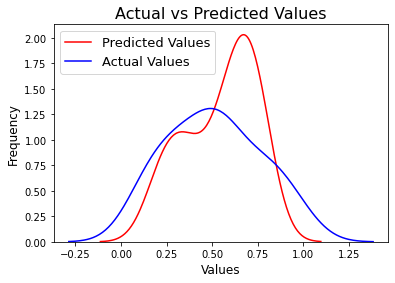

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [ ]:
hyperParameterTuning(df3)

### เซตแรก

In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)

<ipython-input-92-2db422769c5c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
xgb_model = XGBRegressor(alpha = 0,colsample_bytree=0.9,learning_rate = 0.05,max_depth = 5,min_child_weight=1,
        n_estimators = 1000,subsample = 0.5,seed = 216)

In [ ]:
XGB= xgb_model.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, XGB.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, XGB.predict(X_train)))

R2 Value Train: 0.9999958322891889
MSE Train: 1.442930338798312e-07
MAE Train: 0.0003012548572432403


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.3420715528613735


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.6865404094623713
MSE Test: 0.019699327296470576
MAE Test: 0.12155126784797855


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


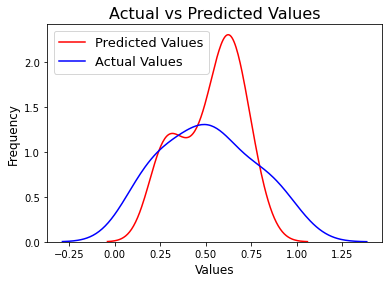

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### เซตสอง (หลักของ control)

In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)

<ipython-input-100-2db422769c5c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
xgb_model = XGBRegressor(alpha = 0,colsample_bytree=0.9,learning_rate = 0.05,max_depth = 3,min_child_weight=1
        ,n_estimators = 1000,subsample = 0.5,seed = 216)

In [ ]:
XGB= xgb_model.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, XGB.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, XGB.predict(X_train)))

R2 Value Train: 0.9999942390964864
MSE Train: 1.994519973959886e-07
MAE Train: 0.0003563634218296539


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.312811671546061


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.7085104385628173
MSE Test: 0.018318623668228215
MAE Test: 0.11772077150602712


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


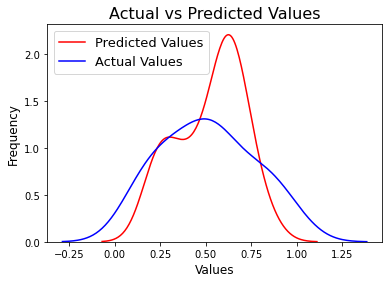

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### set 3 

{'alpha': 0,
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100,
 'seed': 216,
 'subsample': 1}

In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)

<ipython-input-108-2db422769c5c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
xgb_model = XGBRegressor(alpha = 0,colsample_bytree=0.7,learning_rate = 0.1,max_depth = 5,min_child_weight=1
        ,n_estimators = 100,subsample = 1,seed = 216)

In [ ]:
XGB= xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

[19:12:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, XGB.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, XGB.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, XGB.predict(X_train)))

R2 Value Train: 0.9999196288532854
MSE Train: 2.7825818827822357e-06
MAE Train: 0.0012011263659971155


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.35396252914659915


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.657155319434179
MSE Test: 0.021546029466625177
MAE Test: 0.12142884641276301


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


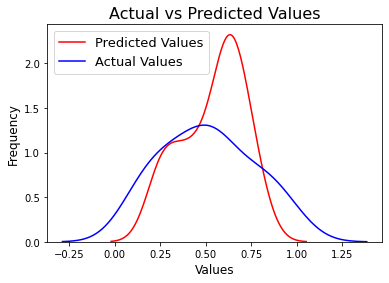

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)